In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
def get_names_and_adjacency_matrix(filename=''):
    '''
    This function takes a filename and returns a list of names
    and an adjacency matrix.
    '''
    df = pd.read_excel(filename)
    df = df.fillna(0)                    # Fill NaN with '0'
    names = list(df[df.columns[1]])[1:]  # Column 1 has names (Except the 1st entry)
    df = df[df.columns[2:]][1:]          # 1st 2 columns and 1st row are names and indexes
    for col in df.columns:               # Remove any 'faulty' data in the sheet
        df[col] = df[col].apply(lambda x:1 if x==1 else 0)
    adj_mat = df.to_numpy(np.int64)
    return (names, adj_mat)

In [3]:
def generate_graph(adj_mat):
    '''
    This function takes an adjacency matrix as input,
    draws a networkx graph and returns it.'''
    G = nx.DiGraph(adj_mat.T)     # The matrix is is column form but networkx needs rowwise
    nx.draw(G)
    return G

In [4]:
def generate_random_walk(G):
    '''
    This function taks a graph and returns a dictionary containing the 
    frequency distribution of occurence of nodes in a random walk of 100000.
    '''
    
    node_count = {i:0 for i in range(len(G.nodes()))}
    choice = random.choice(range(len(G.nodes())))
    node_count[choice]+=1
    for i in range(100000):
        choice = random.choice(list(G.out_edges(choice)))[1]   # G.out_edges returns a list of tuples similar to key value pair
        node_count[choice]+=1
    return node_count

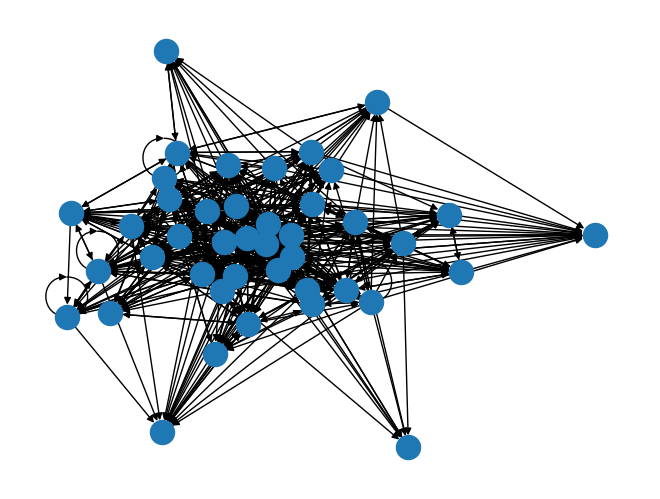

In [5]:
names, adj_mat = get_names_and_adjacency_matrix('Leader_final.xlsx')
G = generate_graph(adj_mat=adj_mat)

In [6]:
node_count = generate_random_walk(G)
final_distribution = pd.Series(data=node_count.values(), index=names).sort_values(ascending=False)
print(final_distribution)

Gupta, Aayush               10503
R K, Vysakh                  4498
Pasricha, Stuti              3593
Sonnathi, Sumanth            3392
Gupta, Shivanshu             3230
Shelke, Ganesh Balasaheb     3198
Pandey, Aditya               3115
Agravanshi, Subandhu         3024
Walia, Muskaan               2829
K, Monish                    2808
Kumar, Kishlay               2779
Abdul Khader, Syed           2731
Paul, Suvrojyoti             2614
Singh, Asheesh Kumar         2587
Narayan, Anchit              2523
Wasan, Pragya                2392
Saini, Vanshu                2268
Sankar, Kirubananth          2255
Satheesan, Pranav            2251
Kapoor, Prashant             2199
Pandey, Savyasachi           2184
Krishna K, Pramod            2178
Nalluri, Bhanuchandu         2153
Gowda, Adarsh                2028
Bhardwaj, Himanshu           1973
Singh, Gaurav                1960
Nair, Adarsh                 1727
Kumar Singh, Tejasvi         1706
Bhardwaj, Kunal              1678
Sahu, Tamanna 

<BarContainer object of 5 artists>

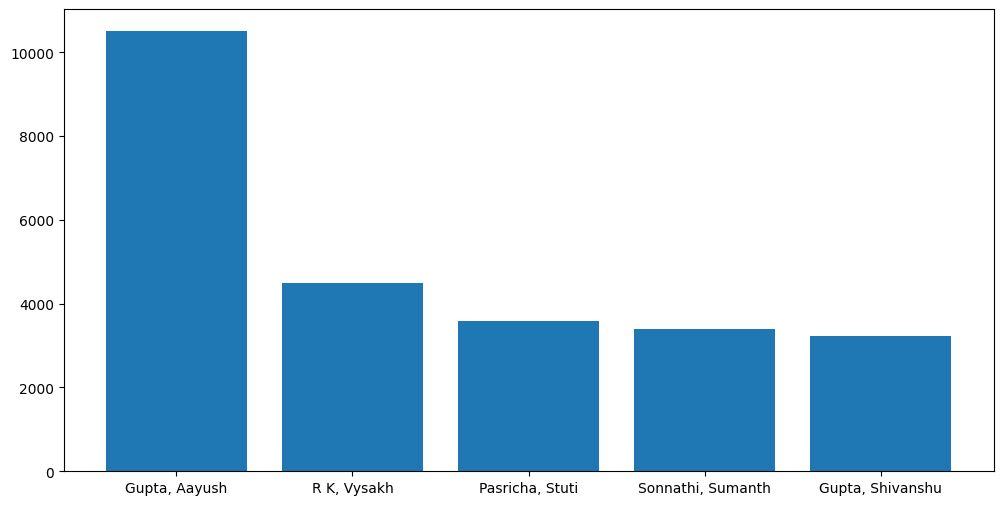

In [7]:
plt.figure(figsize=(12,6))
plt.bar(x=final_distribution.index[:5] ,height=final_distribution.values[:5])